In [41]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





In [42]:
df = pd.read_csv('D:\Rohan_PES\SEM 6\Capstone\Service 5G 1500 records.csv')

In [43]:
df

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,09-03-2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,09-03-2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,09-03-2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,09-03-2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,09-03-2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%
...,...,...,...,...,...,...,...,...
1495,09-03-2023 10:00,User_1496,Web_Browsing,-106 dBm,7 ms,0.1 Mbps,0.1 Mbps,70%
1496,09-03-2023 10:00,User_1497,Background_Download,-111 dBm,66 ms,470 Kbps,470 Kbps,60%
1497,09-03-2023 10:00,User_1498,VoIP_Call,-68 dBm,40 ms,30 Kbps,55 Kbps,90%
1498,09-03-2023 10:00,User_1499,Online_Gaming,-53 dBm,35 ms,5.1 Mbps,5.4 Mbps,80%


In [44]:
# Get all insights from the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            1500 non-null   object
 1   User_ID              1500 non-null   object
 2   Application_Type     1500 non-null   object
 3   Signal_Strength      1500 non-null   object
 4   Latency              1500 non-null   object
 5   Required_Bandwidth   1500 non-null   object
 6   Allocated_Bandwidth  1500 non-null   object
 7   Resource_Allocation  1500 non-null   object
dtypes: object(8)
memory usage: 93.9+ KB


In [45]:
# Check for NULL Values
df.isna().sum()

Timestamp              0
User_ID                0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
dtype: int64

In [46]:
# Check for Duplicates
df.duplicated().sum()

np.int64(0)

In [47]:
# Start with encoding df['Application_Type']

df['Application_Type'].unique()

array(['Video_Call', 'Voice_Call', 'Streaming', 'Emergency_Service',
       'Online_Gaming', 'Background_Download', 'Web_Browsing',
       'IoT_Temperature', 'Video_Streaming', 'File_Download', 'VoIP_Call'],
      dtype=object)

In [48]:
from sklearn.preprocessing import OrdinalEncoder

# Arrange data in ordered categories
data = [['IoT_Temperature', 'Web_Browsing', 'VoIP_Call', 'Voice_Call', 'Video_Call', 'File_Download',
    'Background_Download', 'Streaming', 'Video_Streaming', 'Online_Gaming', 'Emergency_Service']]

encoder = OrdinalEncoder(categories=data)

print(df['Application_Type'].unique())
df['Application_Type'] = encoder.fit_transform(np.array(df['Application_Type']).reshape(-1,1))
print(df['Application_Type'].unique())

['Video_Call' 'Voice_Call' 'Streaming' 'Emergency_Service' 'Online_Gaming'
 'Background_Download' 'Web_Browsing' 'IoT_Temperature' 'Video_Streaming'
 'File_Download' 'VoIP_Call']
[ 4.  3.  7. 10.  9.  6.  1.  0.  8.  5.  2.]


In [49]:
# Remove unwanted substr and convert df['Resource_Allocation'] to int dtype

df['Resource_Allocation'] = df['Resource_Allocation'].str.replace('%','').astype('int')

In [50]:
# Remove unwanted substr and convert df['User_ID'] to int dtype

df['User_ID'] = df['User_ID'].str.replace('User_','').astype('int')

In [51]:
# Bandwidth contains 2 units : Kbps and Mbps, where Kbps=1000*Mbps
# Mbps : Convert to Kbps
# Kbps : Leave as it is

def mbps_to_kbps(value):  
    if 'Mbps' in value:
        n = float(value.replace(' Mbps',''))
        return str(n*1000)+' Kbps'
    else:
        return value


df['Required_Bandwidth'] = df['Required_Bandwidth'].map(mbps_to_kbps)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].map(mbps_to_kbps)

In [52]:
# Remove unwanted substr and convert df['Required_Bandwidth'] and 
# df['Allocated_Bandwidth'] to int dtype

df['Required_Bandwidth'] = df['Required_Bandwidth'].str.replace(' Kbps','').astype('float')
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].str.replace(' Kbps','').astype('float')

In [53]:
# Remove unwanted substr and convert df['Latency'] to int dtype
df['Latency'] = df['Latency'].str.replace(' ms','').astype('int')

In [54]:
# Remove unwanted substr and convert df['Signal_Strength'] to int dtype
df['Signal_Strength'] = df['Signal_Strength'].str.replace(' dBm','').astype('int')

In [55]:
# Cast 'Timestamp' col dtype from object to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            1500 non-null   datetime64[ns]
 1   User_ID              1500 non-null   int64         
 2   Application_Type     1500 non-null   float64       
 3   Signal_Strength      1500 non-null   int64         
 4   Latency              1500 non-null   int64         
 5   Required_Bandwidth   1500 non-null   float64       
 6   Allocated_Bandwidth  1500 non-null   float64       
 7   Resource_Allocation  1500 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 93.9 KB


In [57]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,2023-09-03 10:00:00,1,4.0,-75,30,10000.0,15000.0,70
1,2023-09-03 10:00:00,2,3.0,-80,20,100.0,120.0,80
2,2023-09-03 10:00:00,3,7.0,-85,40,5000.0,6000.0,75
3,2023-09-03 10:00:00,4,10.0,-70,10,1000.0,1500.0,90
4,2023-09-03 10:00:00,5,9.0,-78,25,2000.0,3000.0,85


In [58]:
df.tail()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
1495,2023-09-03 10:00:00,1496,1.0,-106,7,100.0,100.0,70
1496,2023-09-03 10:00:00,1497,6.0,-111,66,470.0,470.0,60
1497,2023-09-03 10:00:00,1498,2.0,-68,40,30.0,55.0,90
1498,2023-09-03 10:00:00,1499,9.0,-53,35,5100.0,5400.0,80
1499,2023-09-03 10:00:00,1500,7.0,-98,49,2500.0,3000.0,85


In [59]:
df.describe()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,1500,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,2023-09-03 10:00:48,750.500000,5.587333,-80.586000,33.436667,3141.256667,3511.315333,74.703333
min,2023-09-03 10:00:00,1.000000,0.000000,-123.000000,0.000000,0.000000,0.000000,50.000000
25%,2023-09-03 10:00:00,375.750000,2.000000,-97.000000,22.000000,457.500000,457.500000,70.000000
50%,2023-09-03 10:00:00,750.500000,6.000000,-83.000000,31.000000,1200.000000,1350.000000,70.000000
75%,2023-09-03 10:00:00,1125.250000,8.000000,-65.000000,44.000000,4100.000000,4425.000000,80.000000
max,2023-09-03 10:06:00,1500.000000,10.000000,-40.000000,110.000000,14500.000000,15800.000000,90.000000
std,NaN,433.157015,3.157798,19.782572,20.883855,3939.855382,4422.531621,8.980484


In [60]:
# 'User_ID' having very less effect on result, so remove it
df.drop('User_ID', axis=1, inplace=True)

In [61]:
df

,Timestamp,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,2023-09-03 10:00:00,4.0,-75,30,10000.0,15000.0,70
1,2023-09-03 10:00:00,3.0,-80,20,100.0,120.0,80
2,2023-09-03 10:00:00,7.0,-85,40,5000.0,6000.0,75
3,2023-09-03 10:00:00,10.0,-70,10,1000.0,1500.0,90
4,2023-09-03 10:00:00,9.0,-78,25,2000.0,3000.0,85
...,...,...,...,...,...,...,...
1495,2023-09-03 10:00:00,1.0,-106,7,100.0,100.0,70
1496,2023-09-03 10:00:00,6.0,-111,66,470.0,470.0,60
1497,2023-09-03 10:00:00,2.0,-68,40,30.0,55.0,90
1498,2023-09-03 10:00:00,9.0,-53,35,5100.0,5400.0,80


<Axes: xlabel='Resource_Allocation', ylabel='count'>

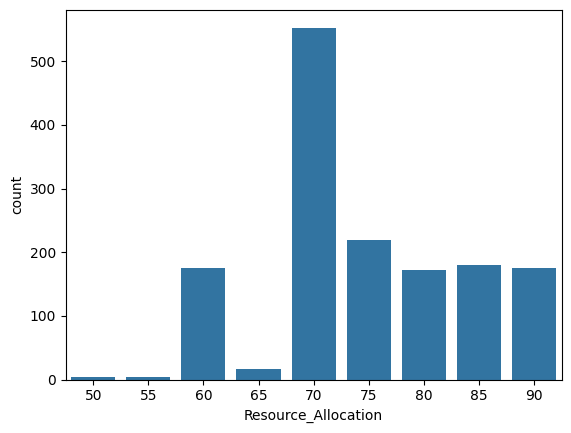

In [65]:
# Find count of values in target variable
sns.countplot(x=df['Resource_Allocation'])

<Axes: >

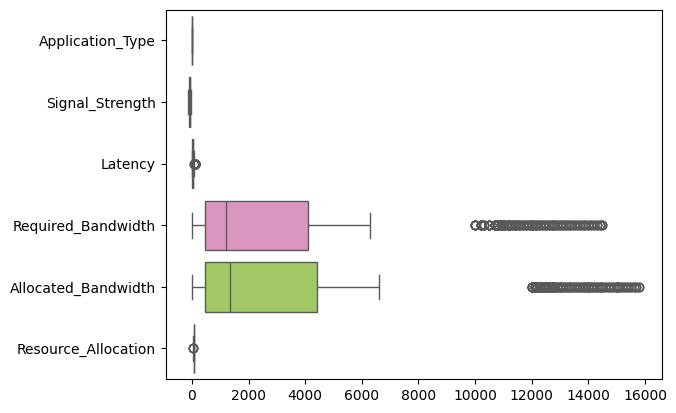

In [66]:
# Finding Outliers

sns.boxplot(data=df, orient="h", palette="Set2")  # Use sns.violinplot() for a violin plot

<Axes: ylabel='Signal_Strength'>

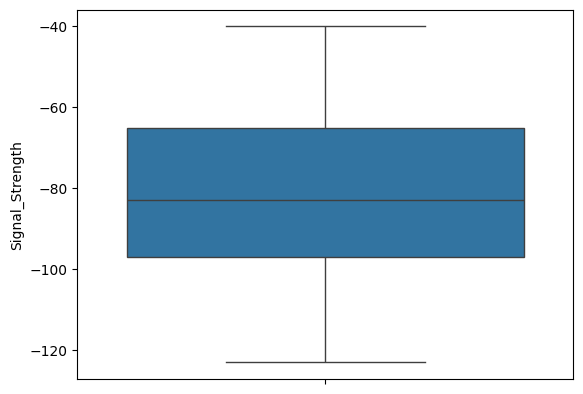

In [67]:
sns.boxplot(data=df['Signal_Strength'])
# No outtliers present

<Axes: ylabel='Latency'>

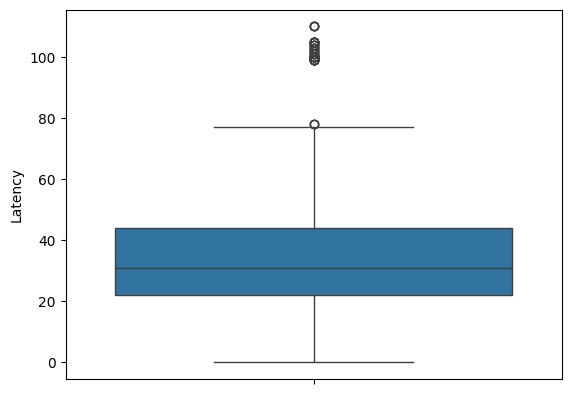

In [68]:
sns.boxplot(data=df['Latency']) 
# Outliers present on positive side

In [69]:
# Cannot transform latency data to handle outliers=> Leads to greater number of outliers
# So, Removing outliers from 'Latency'

Q1 = np.percentile(df['Latency'], 25, method='midpoint')
Q3 = np.percentile(df['Latency'], 75, method='midpoint')

IQR = Q3-Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

upper_val = np.where(df['Latency'] >= upper)
lower_val = np.where(df['Latency'] <= lower)
# Removing the outliers
df.drop(upper_val[0], inplace=True)
df.drop(lower_val[0], inplace=True)

<Axes: ylabel='Latency'>

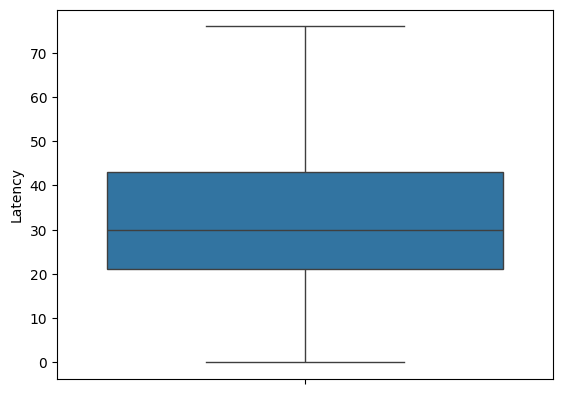

In [70]:
sns.boxplot(data=df['Latency']) 

In [71]:
df.shape

(1442, 7)

<Axes: ylabel='Required_Bandwidth'>

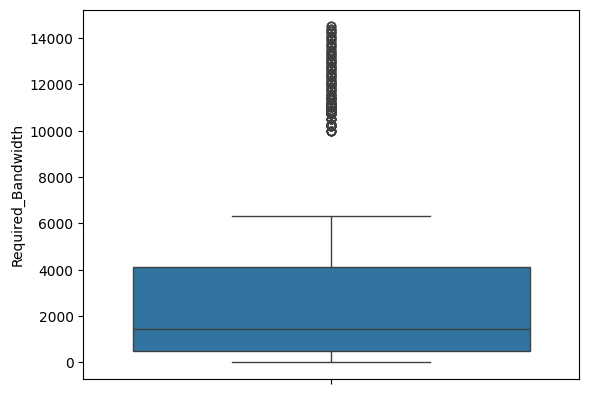

In [72]:
sns.boxplot(data=df['Required_Bandwidth']) 
# Outliers present on positive side

<Axes: ylabel='Required_Bandwidth'>

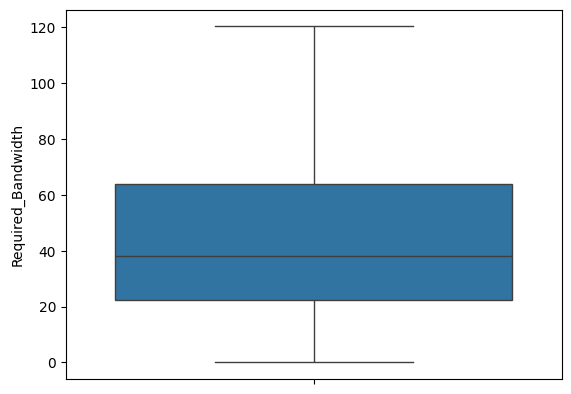

In [73]:
# Can handle outliers in 'Required_Bandwidth', using Transformation
# So, use "Square Root Transformation (np.sqrt())""

df['Required_Bandwidth'] = np.sqrt(df['Required_Bandwidth'])

sns.boxplot(data=df['Required_Bandwidth']) 

<Axes: ylabel='Allocated_Bandwidth'>

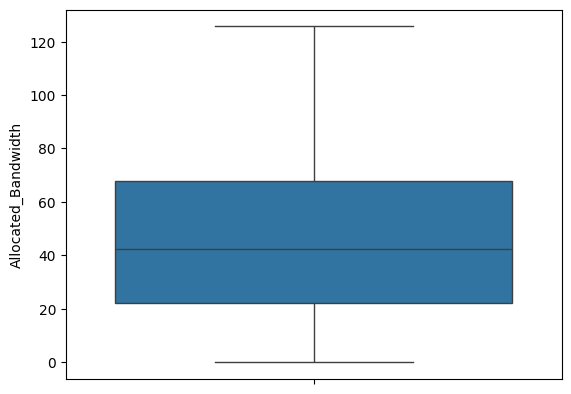

In [74]:
df['Allocated_Bandwidth'] = np.sqrt(df['Allocated_Bandwidth'])

sns.boxplot(data=df['Allocated_Bandwidth']) 

<Axes: >

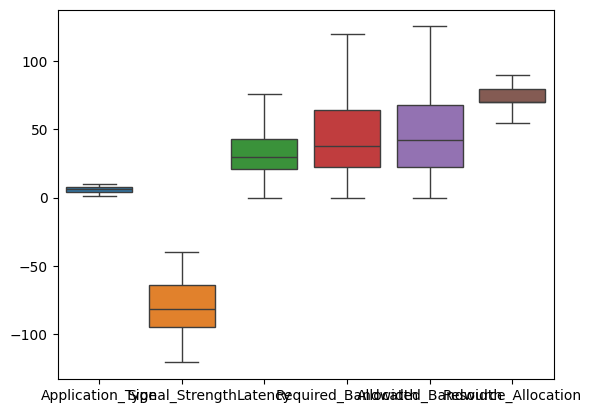

In [75]:
sns.boxplot(data=df) 
# Outliers removed from all the columns
# But data is present over very wide ranges
# So, have to normalize data to one range

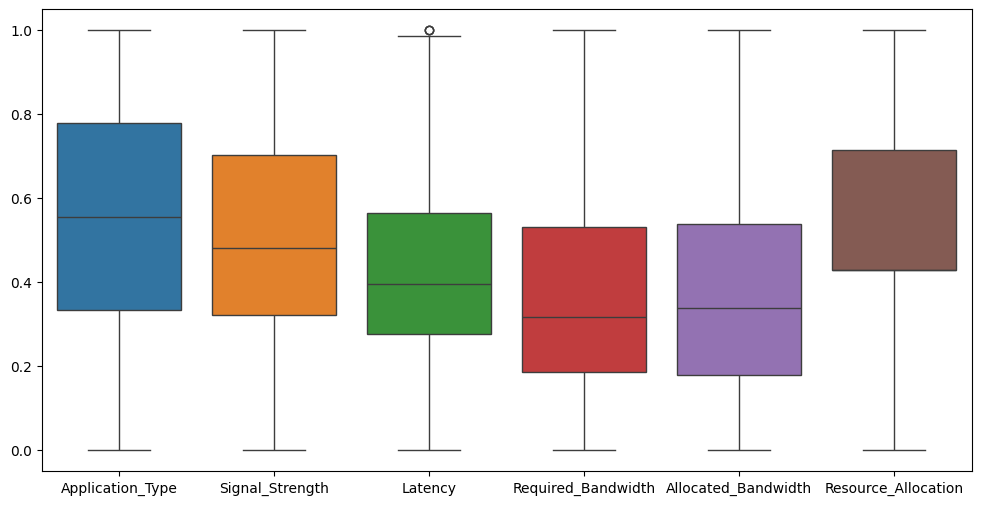

In [76]:
# Define the min-max scaling function
def min_max_scaling(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

Transformed_df = df
Transformed_df['Signal_Strength'] = min_max_scaling(df['Signal_Strength'])
Transformed_df['Latency'] = min_max_scaling(df['Latency'])
Transformed_df['Required_Bandwidth'] = min_max_scaling(df['Required_Bandwidth'])
Transformed_df['Allocated_Bandwidth'] = min_max_scaling(df['Allocated_Bandwidth'])
Transformed_df['Resource_Allocation'] = min_max_scaling(df['Resource_Allocation'])
Transformed_df['Application_Type'] = min_max_scaling(df['Application_Type'])

Transformed_df.drop('Timestamp', axis=1, inplace=True)

plt.figure(figsize=(12,6))
sns.boxplot(data=Transformed_df)
plt.show()
# Thus, all columns data now comes in same range

In [77]:
Transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Application_Type     1442 non-null   float64
 1   Signal_Strength      1442 non-null   float64
 2   Latency              1442 non-null   float64
 3   Required_Bandwidth   1442 non-null   float64
 4   Allocated_Bandwidth  1442 non-null   float64
 5   Resource_Allocation  1442 non-null   float64
dtypes: float64(6)
memory usage: 78.9 KB


In [78]:
Transformed_df.describe()

,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,0.531900,0.509837,0.404938,0.389956,0.394347,0.569150
std,0.337124,0.242172,0.215315,0.270602,0.274976,0.256199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.320988,0.276316,0.185695,0.177892,0.428571
50%,0.555556,0.481481,0.394737,0.316181,0.337526,0.428571
75%,0.777778,0.703704,0.565789,0.531751,0.539573,0.714286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
X = Transformed_df.drop('Resource_Allocation', axis=1)
Y = Transformed_df['Resource_Allocation']

In [1]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

NameError: name 'X' is not defined

In [81]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1153, 5), (289, 5), (1153,), (289,))

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lin_regressor = LinearRegression()
lin_regressor.fit(x_train,y_train)

LinearRegression()

In [84]:
lin_regressor_y_pred = lin_regressor.predict(x_test)

In [85]:
from sklearn.metrics import r2_score, mean_squared_error

In [86]:
lin_regressor_r2 = r2_score(y_test, lin_regressor_y_pred)
lin_regressor_r2

0.382194105489448

In [87]:
lin_regressor_mse = mean_squared_error(y_test, lin_regressor_y_pred)
lin_regressor_mse

np.float64(0.0375140251930897)

In [88]:
lin_regressor_rmse = np.sqrt(lin_regressor_mse)
lin_regressor_rmse

np.float64(0.1936853768178943)

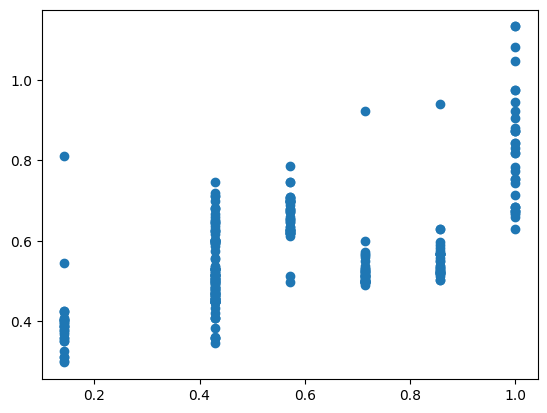

In [89]:
plt.scatter(y_test, lin_regressor_y_pred)
plt.show()


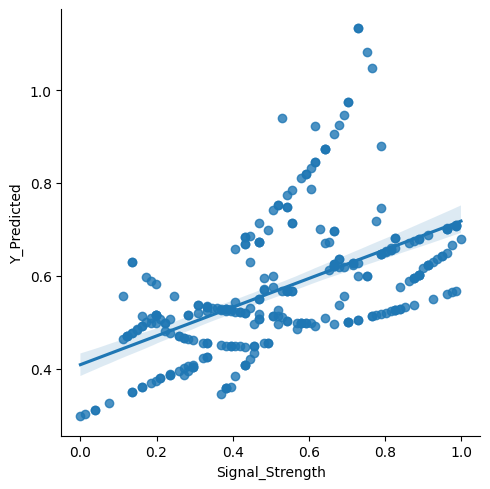

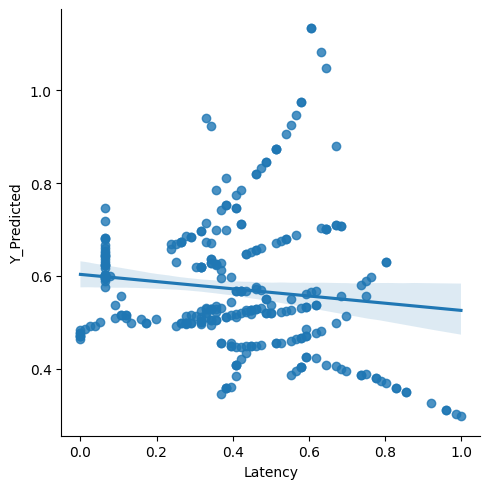

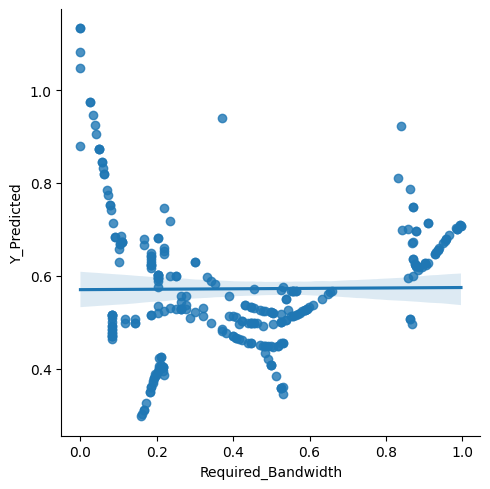

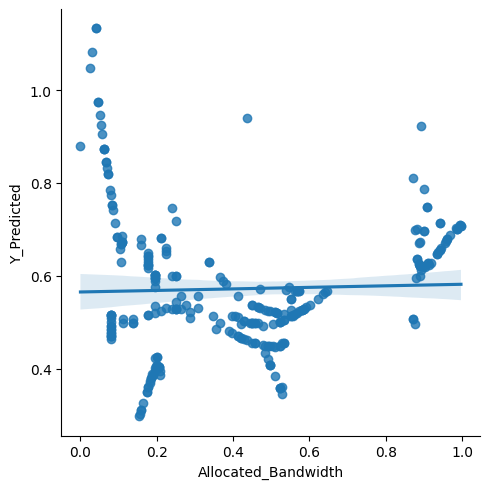

In [90]:
# Scatter Plots of each feature vs predicted value with regression line

lin_regressor_plot = x_test
lin_regressor_plot['Y_Predicted'] = lin_regressor_y_pred

sns.lmplot(x='Signal_Strength', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Latency', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Required_Bandwidth', y='Y_Predicted', data=lin_regressor_plot)
sns.lmplot(x='Allocated_Bandwidth', y='Y_Predicted', data=lin_regressor_plot)

plt.show()

In [91]:
from sklearn.svm import SVR

In [92]:
svr = SVR(kernel='poly')
svr.fit(x_train, y_train)

SVR(kernel='poly')

In [93]:
x_test.drop('Y_Predicted', axis=1, inplace=True)

In [94]:
svr_y_pred = svr.predict(x_test)

In [95]:
svr_r2 = r2_score(y_test, svr_y_pred)
svr_r2

0.805331222087614

In [96]:
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_mse

np.float64(0.011820556430104604)

In [97]:
svr_rmse = np.sqrt(svr_mse)
svr_rmse

np.float64(0.10872238237871999)

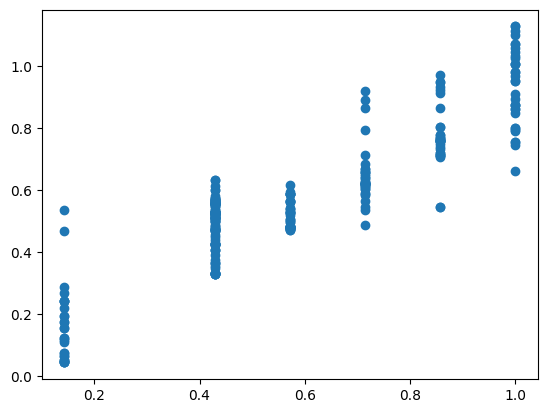

In [98]:
# Plot Actual vs Predicted Values

plt.scatter(y_test, svr_y_pred)
plt.show()

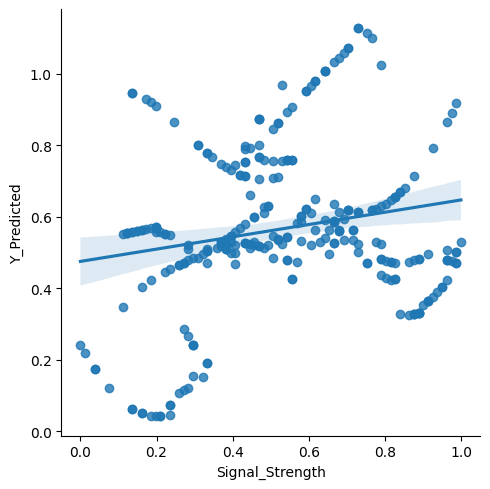

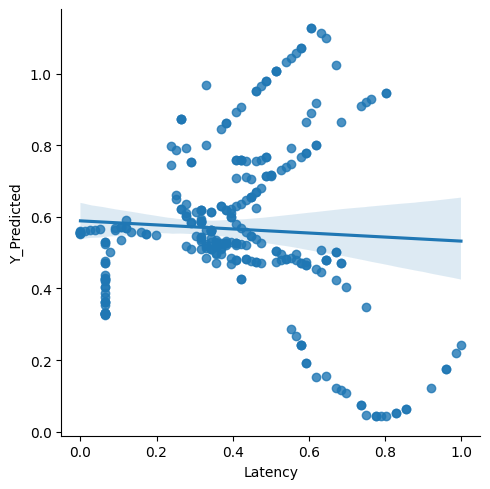

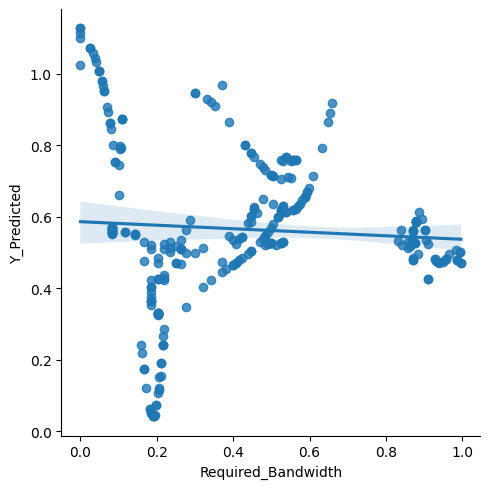

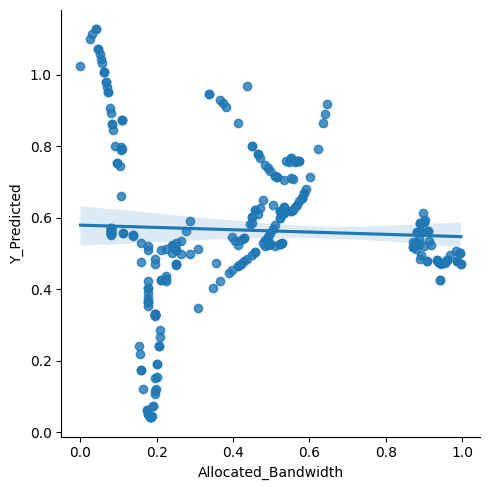

In [99]:
# Scatter Plots of each feature vs predicted value with regression line

lin_regressor_plot = x_test
lin_regressor_plot['Y_Predicted'] = svr_y_pred

sns.lmplot(x='Signal_Strength', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Latency', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Required_Bandwidth', y='Y_Predicted', data=lin_regressor_plot)
sns.lmplot(x='Allocated_Bandwidth', y='Y_Predicted', data=lin_regressor_plot)

plt.tight_layout()
plt.show()

In [100]:
from sklearn.neighbors import KNeighborsRegressor

In [101]:
knn_regr = KNeighborsRegressor(n_neighbors=5)
knn_regr.fit(x_train, y_train)

KNeighborsRegressor()

In [102]:
x_test.drop('Y_Predicted', axis=1, inplace=True)

In [103]:
knn_y_pred = svr.predict(x_test)

In [104]:
knn_r2 = r2_score(y_test, knn_y_pred)
knn_r2

0.805331222087614

In [105]:
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_mse

np.float64(0.011820556430104604)

In [106]:
knn_rmse = np.sqrt(knn_mse)
knn_rmse

np.float64(0.10872238237871999)

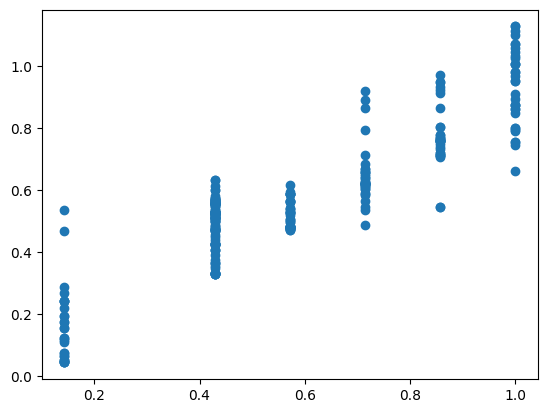

In [107]:
# Plot Actual vs Predicted Values

plt.scatter(y_test, knn_y_pred)
plt.show()

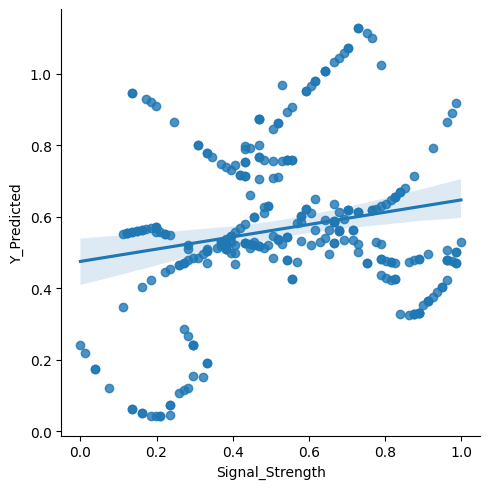

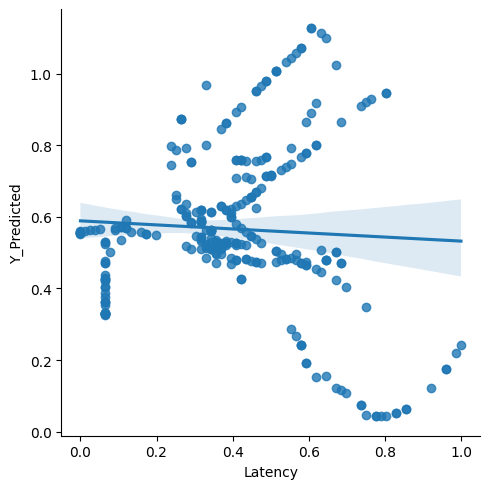

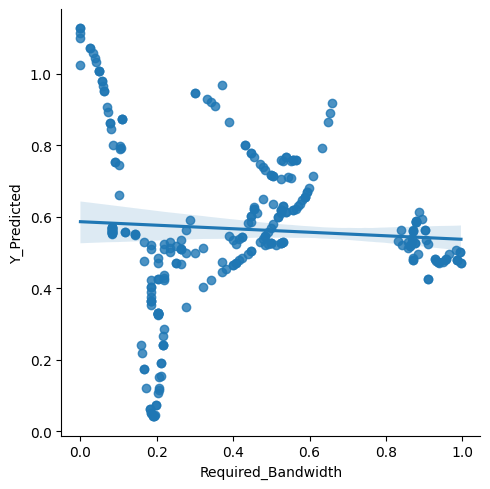

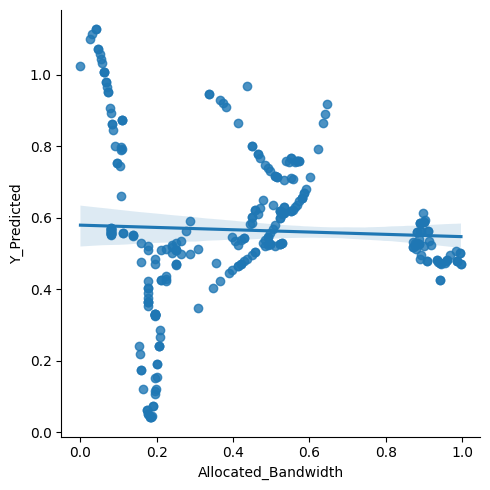

In [108]:
# Scatter Plots of each feature vs predicted value with regression line

lin_regressor_plot = x_test
lin_regressor_plot['Y_Predicted'] = knn_y_pred

sns.lmplot(x='Signal_Strength', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Latency', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Required_Bandwidth', y='Y_Predicted', data=lin_regressor_plot)
sns.lmplot(x='Allocated_Bandwidth', y='Y_Predicted', data=lin_regressor_plot)

plt.tight_layout()
plt.show()

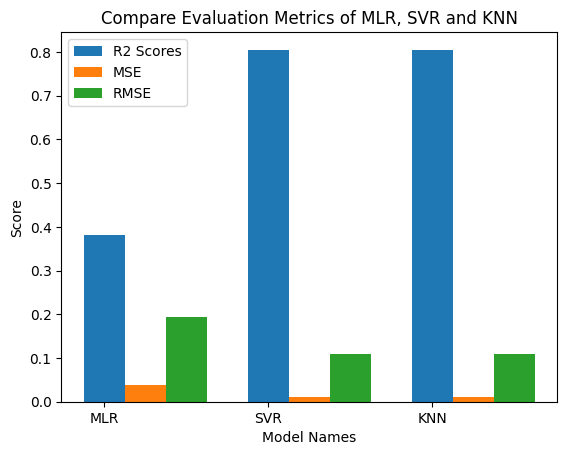

In [109]:
# Create the plot with multiple lines to compare measures like: mse, rmse and r2_score

categories = ['MLR', 'SVR', 'KNN']
x = np.arange(len(categories))
r2_scores = [lin_regressor_r2, svr_r2, knn_r2]
mse_scores = [lin_regressor_mse, svr_mse, knn_mse]
rmse_scores = [lin_regressor_rmse, svr_rmse, knn_rmse]

width = 0.25
fig, ax = plt.subplots()
ax.bar(x, r2_scores, label='R2 Scores', width=0.25)
ax.bar(x+width, mse_scores, label='MSE', width=0.25)
ax.bar(x+2*width, rmse_scores, label='RMSE', width=0.25)

# Customize the plot
plt.xlabel('Model Names')
plt.ylabel('Score')
plt.title('Compare Evaluation Metrics of MLR, SVR and KNN')
plt.legend()  # Show legend with labels
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Show the plot
plt.show()